In [1]:
    import numpy as np
    import pandas as pd
    import sklearn
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error,mean_absolute_error
    from sklearn.model_selection import train_test_split
    import warnings
    warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/Anish G/Desktop/avocado.csv"
df=pd.read_csv(path)
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Above details shows the  dataset being imported

In [3]:
pd.set_option("display.max_rows",None)

The above code is used to show the whole details

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

All columns in dataset

In [6]:
df=pd.DataFrame(data=df)

In [7]:
df.shape

(18249, 13)

We have18249 rows and 13 columns

In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We have float, integer and object datatype dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Shows number of rows,null values and datatypes

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

As we can see there are no null values in any columns

<AxesSubplot:>

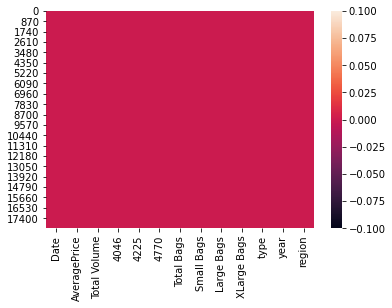

In [11]:
sns.heatmap(df.isnull())

The above heat map shows there are no null values

In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The above data shows standard devation,Mean,Count,25%percentile,50%percentile,75%percentile,minimum value and maximum value

In [13]:
df["AveragePrice"].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [14]:
df["Date"]

0        27-12-2015
1        20-12-2015
2        13-12-2015
3        06-12-2015
4        29-11-2015
5        22-11-2015
6        15-11-2015
7        08-11-2015
8        01-11-2015
9        25-10-2015
10       18-10-2015
11       11-10-2015
12       04-10-2015
13       27-09-2015
14       20-09-2015
15       13-09-2015
16       06-09-2015
17       30-08-2015
18       23-08-2015
19       16-08-2015
20       09-08-2015
21       02-08-2015
22       26-07-2015
23       19-07-2015
24       12-07-2015
25       05-07-2015
26       28-06-2015
27       21-06-2015
28       14-06-2015
29       07-06-2015
30       31-05-2015
31       24-05-2015
32       17-05-2015
33       10-05-2015
34       03-05-2015
35       26-04-2015
36       19-04-2015
37       12-04-2015
38       05-04-2015
39       29-03-2015
40       22-03-2015
41       15-03-2015
42       08-03-2015
43       01-03-2015
44       22-02-2015
45       15-02-2015
46       08-02-2015
47       01-02-2015
48       25-01-2015
49       18-01-2015


In [15]:
from datetime import datetime

In [16]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [18]:
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


I have seperated date column into 3 different columns like day,month and year

In [19]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [20]:
df.drop("Date",axis="columns",inplace=True)

I have dropped date column as per have already seperated it

In [21]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:>

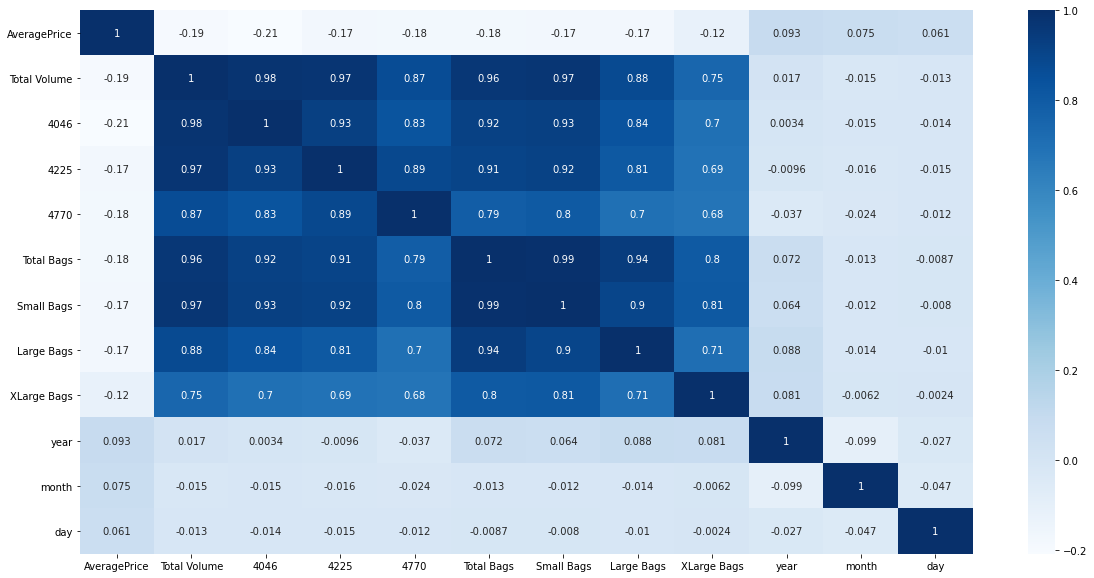

In [22]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

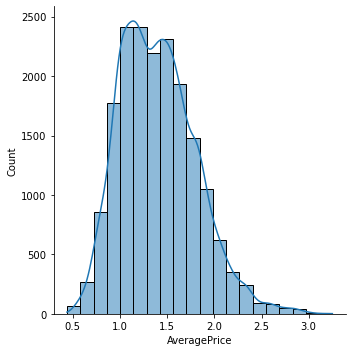

In [23]:
sns.displot(df["AveragePrice"],bins=20,kde=True)

The above distribution plot for AveragePrice

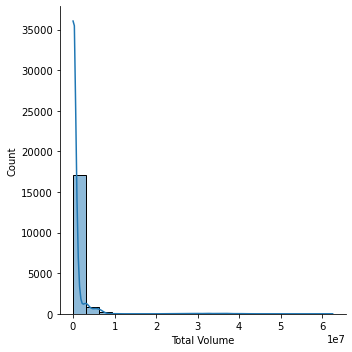

In [24]:
sns.displot(df["Total Volume"],bins=20,kde=True)

The above distribution plot for Total Volume

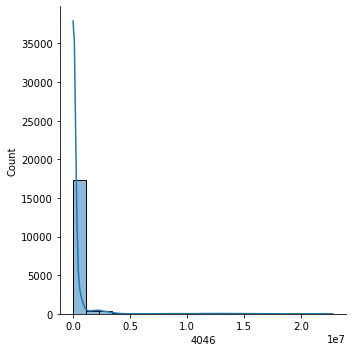

In [25]:
sns.displot(df["4046"],bins=20,kde=True)

The above distribution plot for 4046

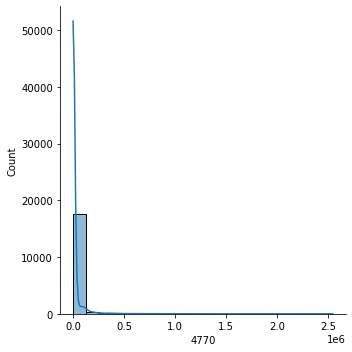

In [26]:
sns.displot(df["4770"],bins=20,kde=True)

The above distribution plot for 4770

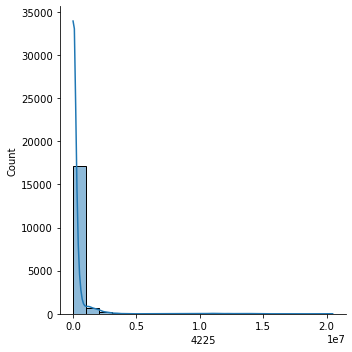

In [27]:
sns.displot(df["4225"],bins=20,kde=True)

The above distribution plot for 4225

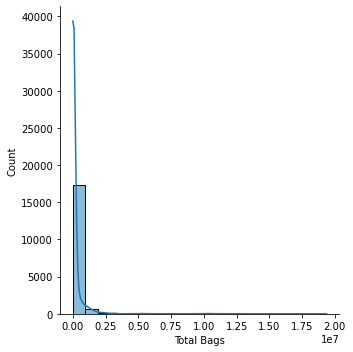

In [28]:
sns.displot(df["Total Bags"],bins=20,kde=True)

The above distribution plot for Total bags

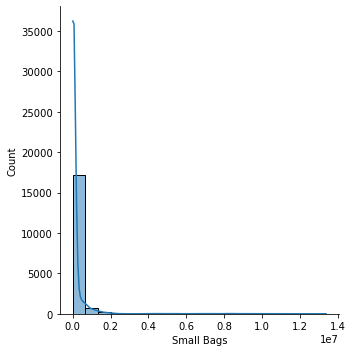

In [29]:
sns.displot(df["Small Bags"],bins=20,kde=True)

The above distribution plot for Small Bags

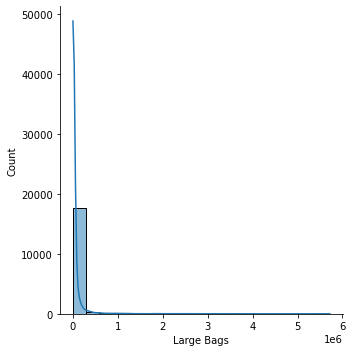

In [30]:
sns.displot(df["Large Bags"],bins=20,kde=True)

The above distribution plot for Large Bags

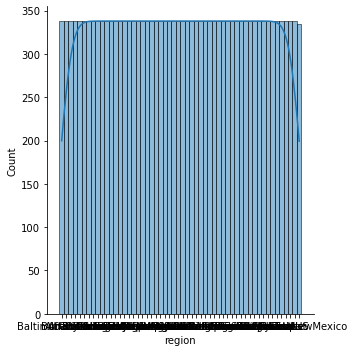

In [31]:
sns.displot(df["region"],bins=100,kde=True)

The above distribution plot for region

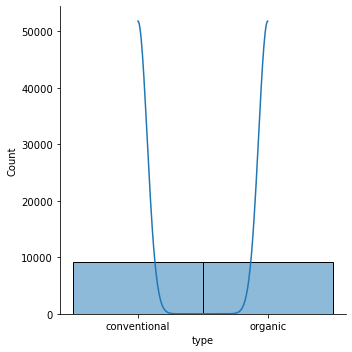

In [32]:
sns.displot(df["type"],bins=100,kde=True)

The above distribution plot for type

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparison between AveragePrice and Total Volume '}, xlabel='AveragePrice', ylabel='Total Volume'>

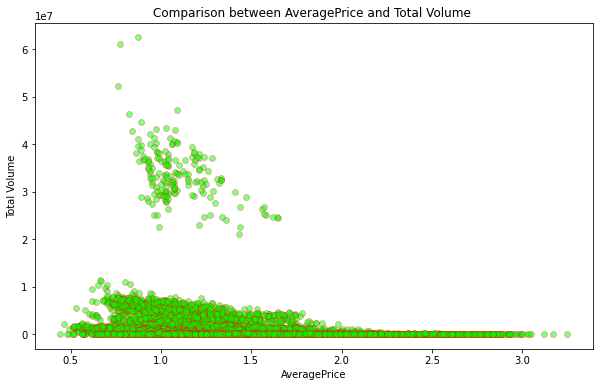

In [33]:
plt.figure(figsize=[10,6])
plt.title("Comparison between AveragePrice and Total Volume ")
sns.scatterplot(df["AveragePrice"],df["Total Volume"],alpha=0.5,c=(0,1,0),edgecolor="r")

This shows the scatter plot for target variable VS column Total Volume. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparison between AveragePrice and 4046 '}, xlabel='AveragePrice', ylabel='4046'>

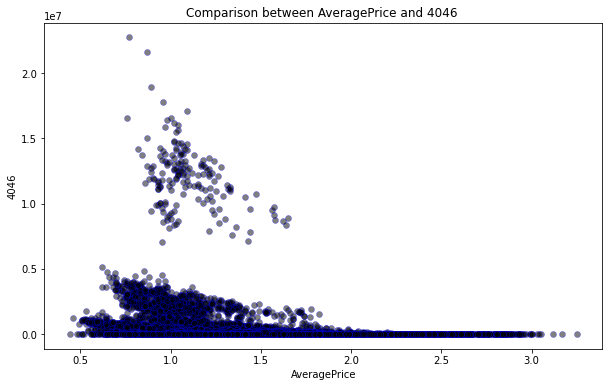

In [34]:
plt.figure(figsize=[10,6])
plt.title("Comparison between AveragePrice and 4046 ")
sns.scatterplot(df["AveragePrice"],df["4046"],alpha=0.5,c=(0,0,0),edgecolor="b")

This shows the scatter plot for target variable VS column 4046. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparison between AveragePrice and XLarge Bags '}, xlabel='AveragePrice', ylabel='XLarge Bags'>

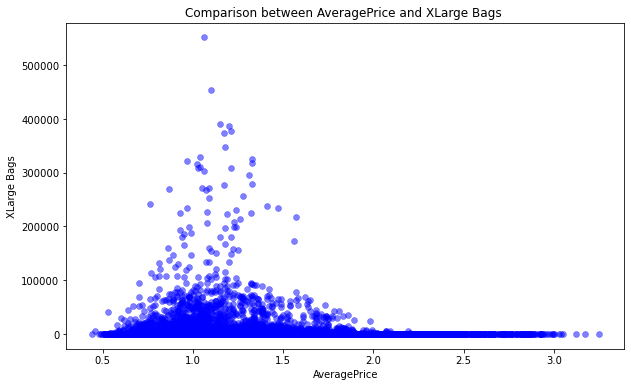

In [35]:
plt.figure(figsize=[10,6])
plt.title("Comparison between AveragePrice and XLarge Bags ")
sns.scatterplot(df["AveragePrice"],df["XLarge Bags"],alpha=0.5,c=(0,0,1),edgecolor="b")

This shows the scatter plot for target variable VS column XLarge Bags. 

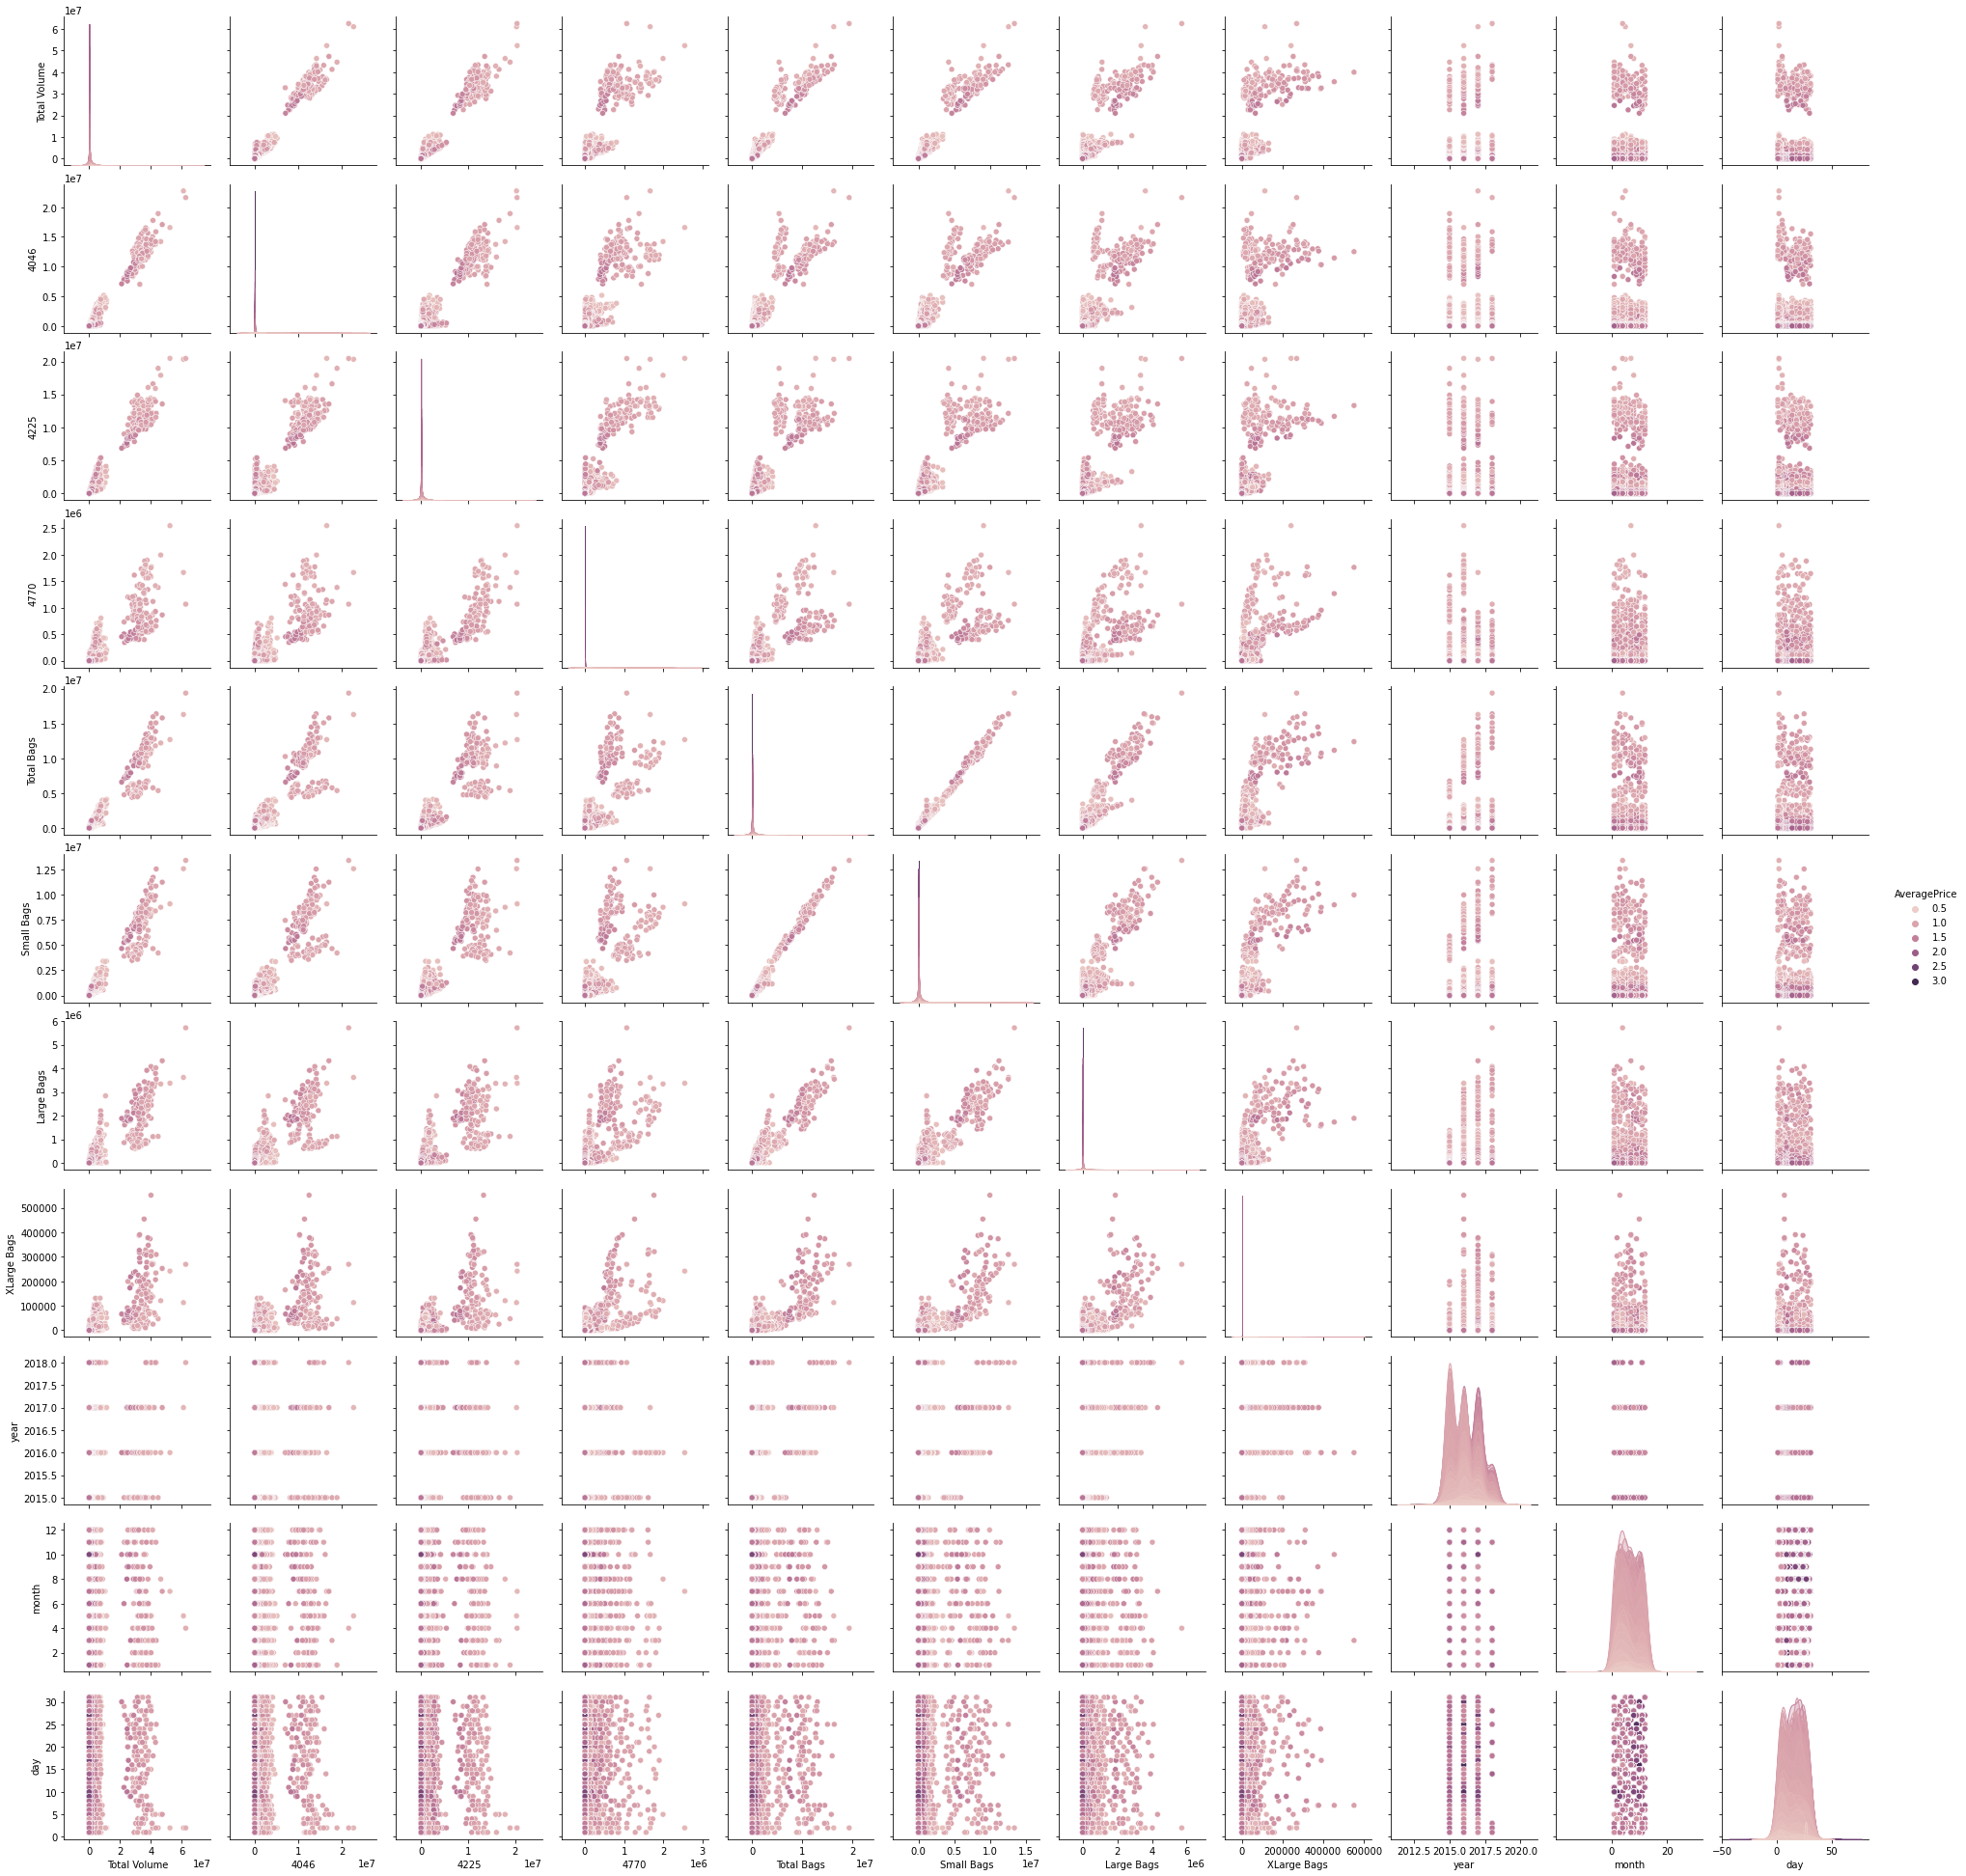

In [36]:
sns.pairplot(df,hue="AveragePrice")

Pair plot with respect to target variable

In [37]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
day               int64
dtype: object

# Ordinal Encoding

In [38]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [39]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

df.head(50)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0.0,2015,0.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0.0,2015,0.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0.0,2015,0.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0.0,2015,0.0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0.0,2015,0.0,11,29
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,0.0,2015,0.0,11,22
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,0.0,2015,0.0,11,15
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,0.0,2015,0.0,8,11
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,0.0,2015,0.0,1,11
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,0.0,2015,0.0,10,25


In [40]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region          float64
month             int64
day               int64
dtype: object

We can see all columns are of integer and float datatype

In [41]:
collist=df.columns.values
ncol=10
nrows=50

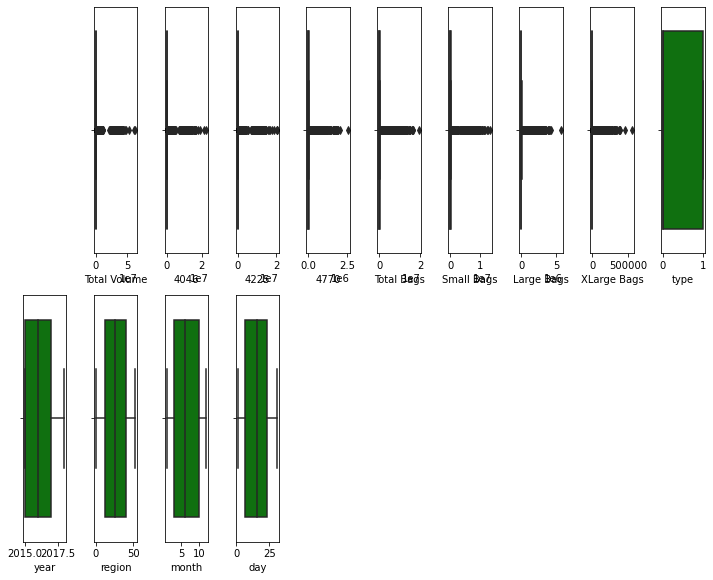

In [42]:
plt.figure(figsize=(ncol,20*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green",orient="v")
plt.tight_layout()

Box plot for few columns

In [43]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.047551
day             -0.001609
dtype: float64

In [44]:
from scipy.stats import zscore

zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [45]:
print("shape before removing the outliers",df.shape)
df_new=df[(zscr<3).all(axis=1)]
print("shape after removing the outliers",df_new.shape)

shape before removing the outliers (18249, 14)
shape after removing the outliers (17651, 14)


In [46]:
Dataloss=((18249-17651)/18249)*100
Dataloss

3.276891884486821

In [47]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [48]:
print("shape before and after")
print("shape before",":",df.shape)
print("shape after",":",df_new.shape)
print("Percentage loss",":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

shape before and after
shape before : (18249, 14)
shape after : (17651, 14)
Percentage loss : 0.36774617787276015


percentage of data loss in IQR & zscore method is alomst same

In [49]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
month           0.046419
day            -0.005030
dtype: float64

# Seperating columns into Independent variables and target variables

In [50]:
x=df_new.drop("AveragePrice",axis=1)
y=df_new[["AveragePrice"]]

# Power transformation Method

In [51]:
from sklearn.preprocessing import power_transform
df_new2=power_transform(x)

df_new2=pd.DataFrame(df_new2,columns=x.columns)

In [52]:
df_new2.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
region         -0.257799
month          -0.161423
day            -0.230935
dtype: float64

As now we can all columns are within the skewness range 

In [53]:
df_new2.shape

(17651, 13)

As we can see after removing outliers we have 17651 rows and 13 columns

In [54]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(df_new2)
x=pd.DataFrame(x,columns=df_new2.columns)

In [55]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047,-1.210618,-2.01059,1.475625,1.214623
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047,-1.210618,-2.01059,1.475625,0.550794
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047,-1.210618,-2.01059,1.475625,-0.180898
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047,-1.210618,-2.01059,-0.017894,-0.293199
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047,-1.210618,-2.01059,1.246164,1.395156


Using Standard Scaler we have scalled the data

In [56]:
x.shape

(17651, 13)

In [57]:
y.shape

(17651, 1)

# Train test split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13767, 13)
(3884, 13)
(13767, 1)
(3884, 1)


# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [60]:
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
lr.coef_

array([[-0.30054998,  0.01776115,  0.26413791,  0.02670743, -0.25429713,
         0.21378989, -0.03341966,  0.00666582,  0.18364842,  0.08566835,
         0.01355007,  0.04047688,  0.02932454]])

In [62]:
lr.intercept_

array([1.40507674])

In [63]:
lr.score(x_train,y_train)

0.5419638235373754

In [64]:
for i in range(0,100):
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is :- 0.5419638235373754
At random state0,the testing accuracy is :- 0.545012479454991


At random state1,the training accuracy is :- 0.5419638235373754
At random state1,the testing accuracy is :- 0.545012479454991


At random state2,the training accuracy is :- 0.5419638235373754
At random state2,the testing accuracy is :- 0.545012479454991


At random state3,the training accuracy is :- 0.5419638235373754
At random state3,the testing accuracy is :- 0.545012479454991


At random state4,the training accuracy is :- 0.5419638235373754
At random state4,the testing accuracy is :- 0.545012479454991


At random state5,the training accuracy is :- 0.5419638235373754
At random state5,the testing accuracy is :- 0.545012479454991


At random state6,the training accuracy is :- 0.5419638235373754
At random state6,the testing accuracy is :- 0.545012479454991


At random state7,the training accuracy is :- 0.5419638235373754
At random state7,the testing accuracy is

In [65]:
pred=lr.predict(x_test)
print("Predicted result : ",pred)
print("actual result",y_test)

Predicted result :  [[1.43116543]
 [1.28552602]
 [0.99809259]
 ...
 [1.37538308]
 [1.04121961]
 [1.60028718]]
actual result        AveragePrice
8959           1.14
9794           1.40
3452           1.14
4203           0.88
13673          1.82
15766          1.62
7351           1.68
4681           0.93
9280           1.22
10986          1.80
5590           0.80
12720          1.25
37             1.13
6499           1.48
3008           0.74
12585          1.46
390            1.17
3536           1.33
8618           0.82
2973           1.17
8533           1.39
10416          1.69
11918          1.66
10907          1.47
5592           0.82
13742          1.15
7097           1.01
9612           1.58
6338           1.03
629            0.85
5427           1.14
3007           0.89
13832          1.23
12217          1.80
3951           0.80
13911          1.58
12237          1.66
13202          1.22
16489          1.98
11866          1.58
17436          1.81
2256           1.15
2843           1

The above values shows actual and predicted values obtained

# DecisionTreeRegressor and its accuracy score

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
preddtr
dtr.score(x_train,y_train)

1.0

# Support vector regressor and its accuracy score

In [67]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
predsv=dtr.predict(x_test)
predsv
sv.score(x_train,y_train)

0.7835070724483593

# MSE,MBE and RMBE


In [68]:
print("error:")
print("Mean absolute error : ",mean_absolute_error(y_test,pred))
print("Mean square error : ",mean_squared_error(y_test,pred))
print(" Root Mean absolute error : ",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error :  0.20486283183930684
Mean square error :  0.06801007066303726
 Root Mean absolute error :  0.26078740510814025


In [69]:
print(r2_score(y_test,pred))

0.545012479454991


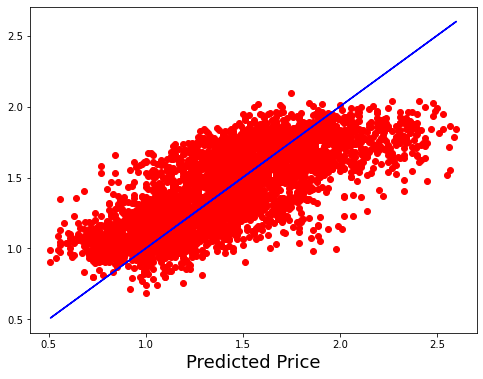

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual Price",fontsize=14)
plt.xlabel("Predicted Price",fontsize=18)
plt.show()

The above scatter plot shows the Actual Price VS Predicted Price

# Regularization with Lasoo and Ridge Regressor

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [72]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [73]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5450192186614459

In [74]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.20015373044165208

In [75]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [76]:
rd=Ridge(alpha=1,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdr=r2_score(y_test,pred_rd)
rdr

0.5450094495241864

In [77]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.20058607724684946

# Ensemble Methods using Random forest and Ada booster

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print("R2 score : ",rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("Cross Val Score : ",rfs*100)

R2 score :  85.21881479161159
Cross Val Score :  85.21881479161159


In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred_ad=ad.predict(x_test)

ads=r2_score(y_test,pred_ad)
print("R2 score : ",ads*100)

adscore=cross_val_score(ad,x,y,cv=5)
adc=adscore.mean()
print("Cross Val Score : ",ads*100)

R2 score :  52.66731917600349
Cross Val Score :  52.66731917600349


# Cross validation 

In [87]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())

[-0.05448681  0.13680661  0.44541591  0.22423816  0.25134492]
0.2006637592414709


In [88]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())    

[-0.26895011  0.42592203  0.21706581  0.34443279  0.03732687]
0.1511594781196991


In [91]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())

[-0.82179205 -0.17165889  0.1384248  -0.54309875 -0.41001997]
-0.36162897255949


In [89]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[-0.0953026   0.3854654   0.57615901  0.1566438   0.04681631]
0.21395638574897244


In [90]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[-1.26275901  0.22152971  0.4667067   0.09450044  0.15304607]
-0.0653952172205475


# Saving the best model accuracy

In [92]:
import pickle
filename="Avocado.pkl"
pickle.dump(lr,open(filename,"wb"))

# Conclusion

In [93]:
loaded_model=pickle.load(open("Avocado.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.545012479454991
